# Mini-Project: Applying non-parametric tests to a data set

## Scenario
The task is comparing the customer engagement levels of two new marketing campaigns: Campaign A and Campaign B. To accomplish this, the brand has provided a data set containing engagement scores for each campaign.


## Objective
The goal is to compare the effectiveness of two distinct marketing campaigns. The key metric for comparison is the 'Engagement Score', which reflects customer engagement levels with each campaign.


## Steps
1. Import the necessary libraries and load the data set.
2. Perform an exploratory data analysis to get insights into the data's distribution and potential outliers.
3. Check the distribution of the data using a Shapiro-Wilk test.
4. Formulate a hypothesis to test.
5. Select an appropriate non-parametric test and apply it to the data set to determine if there's a significant difference in engagement between the campaigns.
6. Summarise and interpret your findings. What do the results reveal about the data set and hypothesis?


In [ ]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, shapiro

# Load the dataset.
data = pd.read_csv('https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/marketing_campaign_data.csv')
data.head()

,Campaign,Engagement Score
0,A,59.393215
1,A,74.367043
2,A,64.248704
3,A,59.039486
4,A,48.128932


In [ ]:
data.info()
print("\n")
print(data.shape,"\n")
print(data.describe(),"\n")
data.groupby('Campaign').describe() #inspired by hannah

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Campaign          200 non-null    object 
 1   Engagement Score  200 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


(200, 2) 

       Engagement Score
count        200.000000
mean          53.578789
std           23.575596
min           10.422593
25%           33.452855
50%           57.641549
75%           70.194016
max           98.953645 



Engagement Score                                              \
                    count       mean        std        min        25%   
Campaign                                                                
A                   100.0  52.551446  26.077861  10.422593  28.522284   
B                   100.0  54.606132  20.857724  15.878556  37.169784   

                                           
                50%        75%        max  
Campaign                                   
A         52.073289  71.603493  98.953645  
B         58.143097  69.751757  89.913525

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Campaign          200 non-null    object 
 1   Engagement Score  200 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


<Axes: xlabel='Engagement Score', ylabel='Density'>

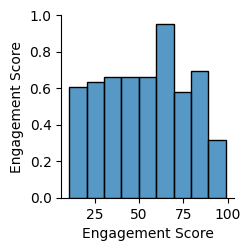

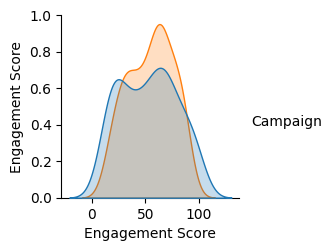

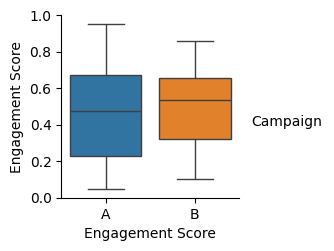

In [ ]:
sns.pairplot(data)
sns.pairplot(data, hue = 'Campaign')
sns.pairplot(data, vars = ['Engagement Score'], hue = 'Campaign')
sns.boxplot(data, x = 'Campaign', y = 'Engagement Score', hue = 'Campaign')

Text(0.5, 1.0, 'Boxplot of Engagement Scores by Campaign')

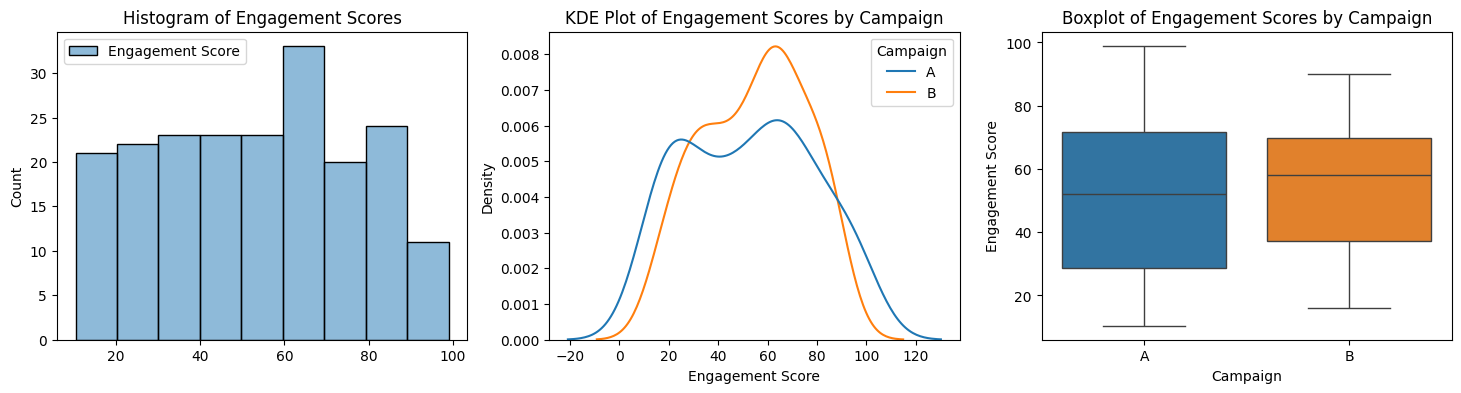

In [ ]:
fig, ax = plt.subplots(1,3, figsize = (18,4))

sns.histplot(data, kde=False, ax=ax[0])
ax[0].set_title('Histogram of Engagement Scores')
sns.kdeplot(data, x='Engagement Score', hue='Campaign', ax=ax[1])
ax[1].set_title('KDE Plot of Engagement Scores by Campaign')
sns.boxplot(data, x='Campaign', y='Engagement Score', hue='Campaign', ax=ax[2])
ax[2].set_title('Boxplot of Engagement Scores by Campaign')

**Distribution looks non-normal, also doesn't look like there's too many outliers. Let's check using Q-Q**

In [ ]:
import scipy.stats as stats

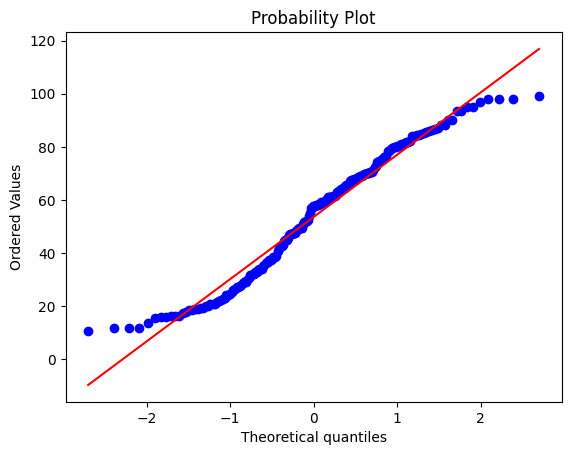

In [ ]:
# Plot a Q-Q plot.
stats.probplot(data['Engagement Score'],
               dist="norm",
               plot=plt)

# View the plot.
plt.show()

**Confirmed that distribution is not normal**

Now to use statistical test. Since sample size > 50, we will use the Kolmogorov-Smirnov test

In [ ]:
# Perform the Shapiro–Wilk test (appropriate m ethod for small sample sizes, n < 50
# Note for sample size n > 50, use kolmogorov-smirnov test
stat, p = stats.kstest(data['Engagement Score'], 'norm')
print("kolmogorov-smirnov statistic:", stat)
print("kolmogorov-smirnov p-value:", p)

kolmogorov-smirnov statistic: 1.0
kolmogorov-smirnov p-value: 0.0


In [ ]:
stat, p = shapiro(data['Engagement Score'])
print("Shapiro-Wilk statistic:", stat)
print("Shapiro-Wilk p-value:", p)

Shapiro-Wilk statistic: 0.9658289809093163
Shapiro-Wilk p-value: 8.924575483318388e-05


**Definitley not normal**

>   - $H_0$: There is no significant difference in engagement scores between campaigns

>   - $H_a$: There is significant difference in engagement scores between campaigns

In [ ]:
campaign_a_engagement = np.array(data[data['Campaign']=='A']['Engagement Score'])
campaign_b_engagement = np.array(data[data['Campaign']=='B']['Engagement Score'])

mannwhitney_stat, mannwhitney_p = mannwhitneyu(campaign_a_engagement,
                                               campaign_b_engagement)

# View the output.
print("Mann-Whitney statistic:", mannwhitney_stat)
print("Mann-Whitney p-value:", mannwhitney_p)

Mann-Whitney statistic: 4741.0
Mann-Whitney p-value: 0.5276378110739883


The output indicates the test statistic ($U$) value is 4741.0. The $p$-value is approximately 0.53. Since the $p$-value is greater than the common alpha ($\alpha$) level of 0.05, we would not reject $H_0$, indicating that there is no significant difference between the two groups based on the provided data.

> No significant difference between the two groups. Going through the process from EDA, to Q-Q + checking normal distribution, doing the tests